In [1]:
import pickle
import matplotlib.pyplot as plt
import gymnasium as gym
import flappy_bird_gymnasium
from utils.test import eval
import torch
import numpy as np

In [2]:
env_lidar = gym.make("FlappyBird-v0", use_lidar=True, render_mode='human') 
obs_size_lidar = env_lidar.observation_space.shape[0]
env = gym.make("FlappyBird-v0", use_lidar=False, render_mode='human') 
obs_size = env.observation_space.shape[0]
n_actions = env_lidar.action_space.n
device = 'cuda' if torch.cuda.is_available() else 'cpu'  

with open('./data/neo_lidar.pkl', 'rb') as f:
    best_neo_lidar, max_fitness_lidar, avg_fitness_lidar = pickle.load(f)

with open('./data/neo.pkl', 'rb') as f:
    best_neo, max_fitness, avg_fitness = pickle.load(f)

with open('./data/dql_lidar.pkl', 'rb') as f:
    best_dql_lidar, rewards_per_episode_lidar, epsilon_history_lidar = pickle.load(f)

with open('./data/dql.pkl', 'rb') as f:
    best_dql, rewards_per_episode, epsilon_history = pickle.load(f)


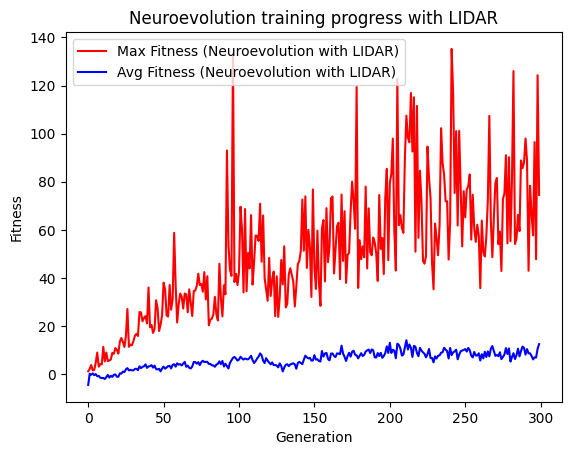

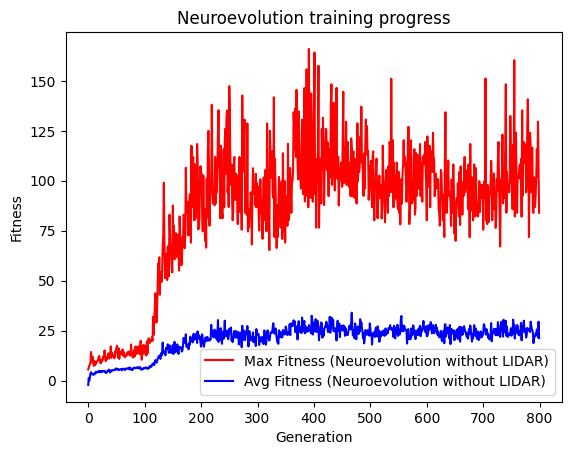

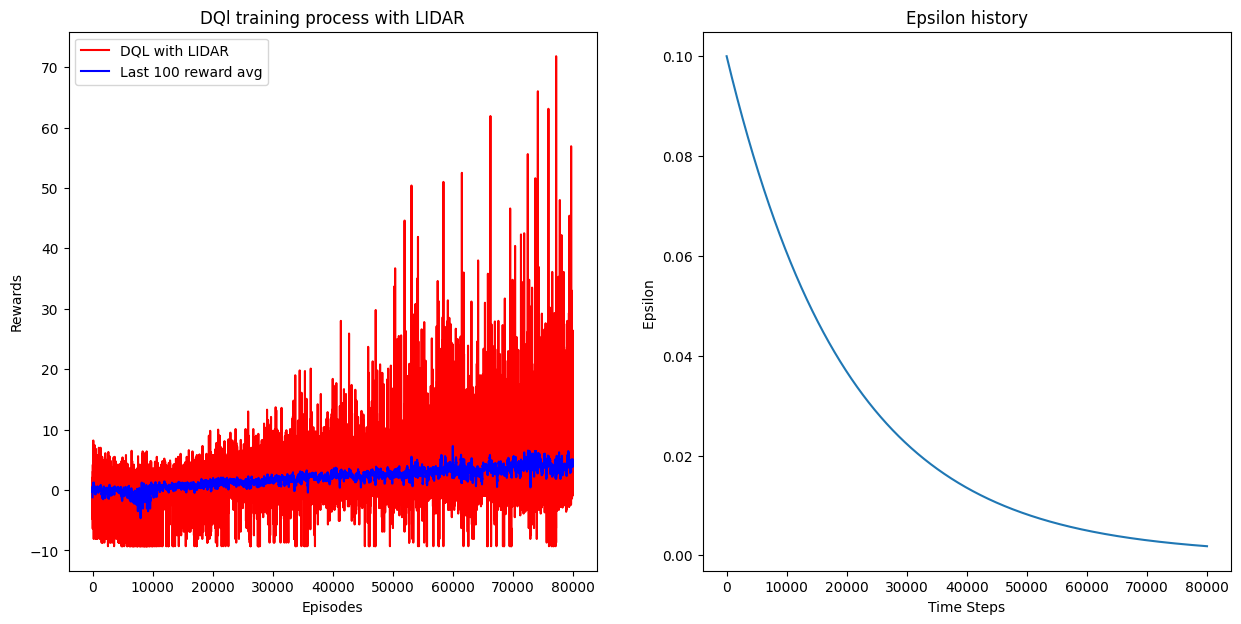

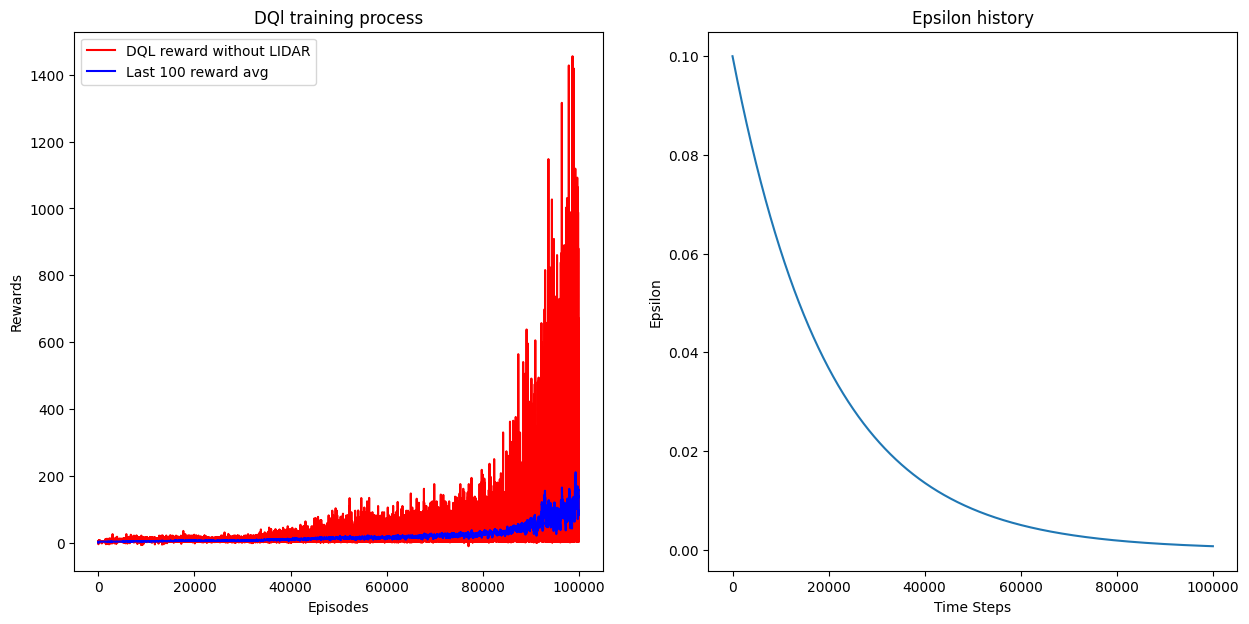

In [3]:
plt.plot(max_fitness_lidar, label='Max Fitness (Neuroevolution with LIDAR)', c='r')
plt.plot(avg_fitness_lidar, label='Avg Fitness (Neuroevolution with LIDAR)', c='b')
plt.xlabel('Generation')
plt.ylabel('Fitness')   
plt.title('Neuroevolution training progress with LIDAR')
plt.legend()
plt.show()

plt.plot(max_fitness, label='Max Fitness (Neuroevolution without LIDAR)', c='r')
plt.plot(avg_fitness, label='Avg Fitness (Neuroevolution without LIDAR)', c='b')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Neuroevolution training progress')
plt.legend()
plt.show()


plt.figure(figsize=(15, 7))
mean_rewards_lidar = np.zeros(len(rewards_per_episode_lidar))
for x in range(len(mean_rewards_lidar)):
    mean_rewards_lidar[x] = np.mean(rewards_per_episode_lidar[max(0, x-99):x+1])
plt.subplot(121) 
plt.plot(rewards_per_episode_lidar, label='DQL with LIDAR', c='r')
plt.plot(mean_rewards_lidar, label='Last 100 reward avg', c='b'),
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('DQl training process with LIDAR')
plt.legend()

plt.subplot(122) 
plt.plot(epsilon_history_lidar)
plt.xlabel('Time Steps')
plt.ylabel('Epsilon ')
plt.title('Epsilon history')

plt.show()

# 24.348905368645987 min

plt.figure(figsize=(15, 7))
mean_rewards = np.zeros(len(rewards_per_episode))
for x in range(len(mean_rewards)):
    mean_rewards[x] = np.mean(rewards_per_episode[max(0, x-99):x+1])
plt.subplot(121) 
plt.plot(rewards_per_episode, label='DQL reward without LIDAR', c='r')
plt.plot(mean_rewards, label='Last 100 reward avg', c='b'),
plt.xlabel('Episodes')
plt.ylabel('Rewards')
plt.title('DQl training process')
plt.legend()

plt.subplot(122) 
plt.plot(epsilon_history)
plt.xlabel('Time Steps')
plt.ylabel('Epsilon')
plt.title('Epsilon history')

plt.show()

# tiempo 58.04616055091222 min

In [11]:
neo_lidar = eval(best_neo_lidar, env_lidar, 'neuroevolution')
neo = eval(best_neo, env, 'neuroevolution')
print(f"Neuroevolution with LIDAR: {neo_lidar}")
print(f"Neuroevolution without LIDAR: {neo}")

dql_lidar = eval(best_dql_lidar, env_lidar, 'DQL', device)
dql = eval(best_dql, env, 'DQL', device)
print(f"DQL with LIDAR: {dql_lidar}")
print(f"DQL without LIDAR: {dql}")


Neuroevolution with LIDAR: 75.3000000000043
Neuroevolution without LIDAR: 88.60000000000525
DQL with LIDAR: 12.880000000000166
DQL without LIDAR: 272.5799999999774
